In [1]:
import matplotlib.pyplot as plt
import numpy as np
from alignment_functions.gal_groups import *

## Catalog

This test catalog was made with large halos from AbacusSummit, at redshit z = 0.8

In [2]:
galaxy_catalog = Table.read('example_data/abacus_simpleMock.fits')
galaxy_catalog.columns

<TableColumns names=('x_L2com','RA','DEC','E1','E2','Z','WEIGHT')>

## Measuring Alignment

In [3]:
# finding and measuring the alignment of groups in the example catalog. This may take about a minute.
get_group_alignment(galaxy_catalog, R_bins=np.logspace(0, 2, 11), pimax=30, print_progress=True,
                        n_sky_regions=9, save_path='example_data/alignment_output.fits')

Making group catalog
Measuring alignment
Results saved to  example_data/alignment_output.fits


R_bin_min,R_bin_max,relAng_plot,relAng_plot_e,pimax
float64,float64,float64,float64,int64
1.0,1.5848931924611136,0.049245068429511735,0.008761530670826455,30
1.5848931924611136,2.51188643150958,0.08922780443567002,0.005809234636321507,30
2.51188643150958,3.981071705534973,0.06927244026864547,0.005936401609490647,30
3.981071705534973,6.309573444801933,0.044576870924935084,0.004700847367803455,30
6.309573444801933,10.0,0.04094052335432783,0.0025626394569633316,30
10.0,15.848931924611142,0.029727372633797832,0.0019263479860032028,30
15.848931924611142,25.11886431509581,0.020503495900344195,0.0012711122592795742,30
25.11886431509581,39.810717055349734,0.013209843591560388,0.0010067591939345961,30
39.810717055349734,63.09573444801933,0.005313055689454639,0.000991090125131596,30


In [4]:
# reading in previously saved results
alignment_result = Table.read('example_data/alignment_output.fits')

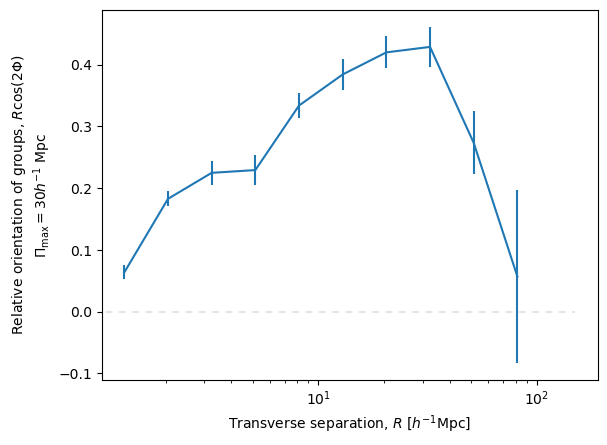

In [5]:
bin_centers = (alignment_result['R_bin_min'] + alignment_result['R_bin_max'])/2
plt.errorbar(bin_centers, bin_centers * alignment_result['relAng_plot'], yerr=bin_centers*alignment_result['relAng_plot_e'])

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of groups, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = 30h^{-1}$ Mpc')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16));

## Using Randoms
To adjust for surgey geometry, let's measure the same signal relative to randoms

In [6]:
random_catalog = Table.read('example_data/abacus_simpleMock_randoms_00.fits')

# measure orientation of groups relative to randoms
get_group_alignment(galaxy_catalog, catalog_for_tracers = random_catalog, R_bins=np.logspace(0, 2, 11), pimax=30, print_progress=True,
                        n_sky_regions=9, save_path='example_data/alignment_output_randoms.fits')

/global/common/software/desi/perlmutter/desiconda/20240425-2.2.0/conda/lib/python3.10/site-packages/astropy/table/table.py:3763: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


Making group catalog
Measuring alignment
Results saved to  example_data/alignment_output_randoms.fits


R_bin_min,R_bin_max,relAng_plot,relAng_plot_e,pimax
float64,float64,float64,float64,int64
1.0,1.5848931924611136,-0.005465747701847432,0.016815133120940528,30
1.5848931924611136,2.51188643150958,0.012083759856422,0.004261747303561583,30
2.51188643150958,3.981071705534973,-0.006385297985599261,0.0020055285897213077,30
3.981071705534973,6.309573444801933,0.0007903441224732465,0.002114016188329281,30
6.309573444801933,10.0,0.0001545166683596166,0.0022220385356576857,30
10.0,15.848931924611142,0.000223873138341268,0.0018390298242942885,30
15.848931924611142,25.11886431509581,0.000477193000955244,0.00044882103799716625,30
25.11886431509581,39.810717055349734,8.200631977319194e-05,0.0006949833494127464,30
39.810717055349734,63.09573444801933,-0.0009096767074509507,0.00103402227698145,30


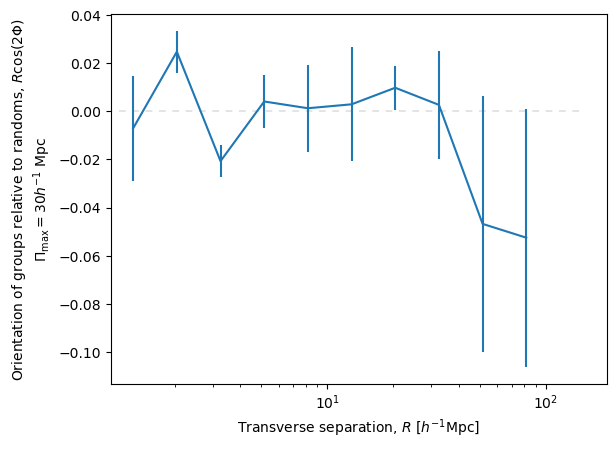

In [7]:
# reading in previously saved results
alignment_result_randoms = Table.read('example_data/alignment_output_randoms.fits')

bin_centers = (alignment_result_randoms['R_bin_min'] + alignment_result_randoms['R_bin_max'])/2
plt.errorbar(bin_centers, bin_centers * alignment_result_randoms['relAng_plot'], yerr=bin_centers*alignment_result_randoms['relAng_plot_e'])

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Orientation of groups relative to randoms, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = 30h^{-1}$ Mpc')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16));

Here we just used one random catalog, but typically many sets should be used. get_group_alignment_randoms() will handle this.
    
The impact from randoms in this example catalog is fairly small, but let's subtract this from the main signal.

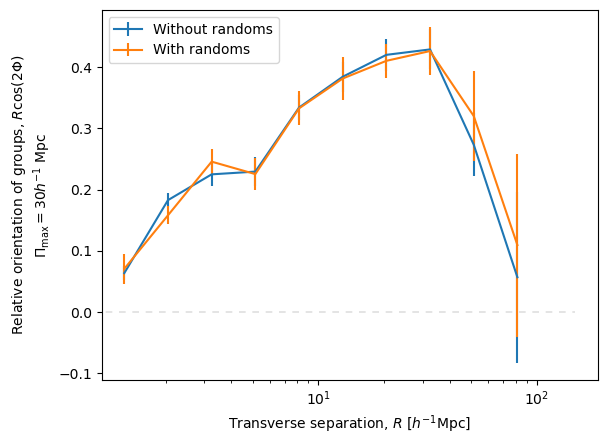

In [8]:
adjusted_signal = alignment_result['relAng_plot'] - alignment_result_randoms['relAng_plot']
adjusted_signal_e = np.sqrt(alignment_result['relAng_plot_e']**2 + alignment_result_randoms['relAng_plot_e']**2)

plt.errorbar(bin_centers, bin_centers * alignment_result['relAng_plot'] , yerr=bin_centers*alignment_result['relAng_plot_e'], label='Without randoms')
plt.errorbar(bin_centers, bin_centers * adjusted_signal, yerr=bin_centers*adjusted_signal_e, label='With randoms')

plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of groups, $R$cos(2$\Phi$)'+'\n'+r'$\Pi_{\rm max} = 30h^{-1}$ Mpc')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,150], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16))
plt.legend();

## Sliding $\Pi_{\text{max}}$
The alignment signal is necessarily averaged over some line-of-sight distance, $\Pi_{\text{max}}$. The optimal $\Pi_{\text{max}}$ depends on the data and bin of projected separation **(more on this in a future notebook)**. Let's now try a version where we use different $\Pi_{\text{max}}$ for different projected bins, $R$. Here is the relationship we'll use:

In [9]:
def sliding_pimax(R):
    return np.asarray(6 + (1/2)* R)

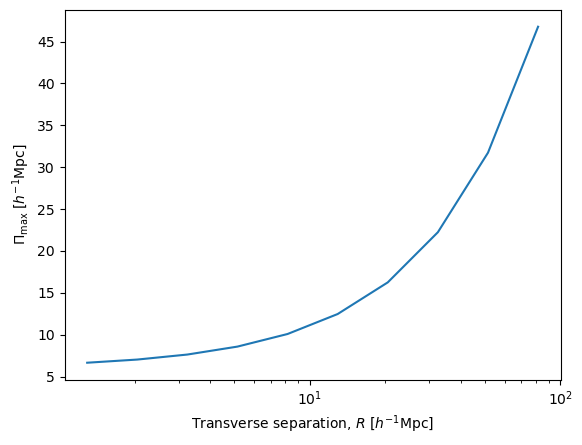

In [10]:
pimax_values = sliding_pimax(bin_centers)
plt.plot(bin_centers, pimax_values)
plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'$\Pi_{\rm max}$ [$h^{-1}$Mpc]');
plt.xscale('log');

In [11]:
# finding and measuring the alignment of groups in the example catalog. This may take about a minute.
alignment_result_slidingPimax = get_group_alignment(galaxy_catalog, R_bins=np.logspace(0, np.log10(80), 11), pimax=pimax_values, print_progress=True, pair_max_los=12,
                        n_sky_regions=9)

Making group catalog
Measuring alignment


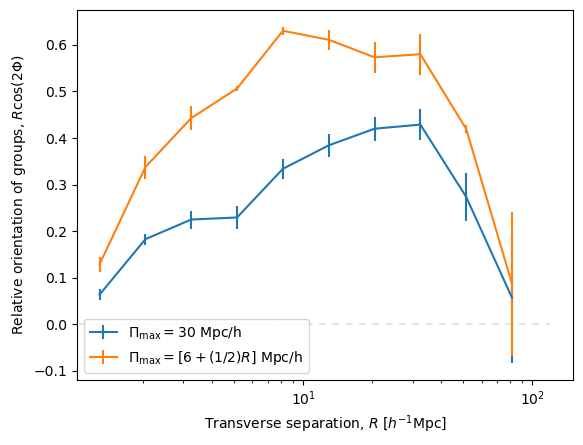

In [12]:
plt.errorbar(bin_centers, bin_centers * alignment_result['relAng_plot'], yerr=bin_centers*alignment_result['relAng_plot_e'], label=r'$\Pi_{\rm max} = 30$ Mpc/h')
plt.errorbar(bin_centers, bin_centers * alignment_result_slidingPimax['relAng_plot'], yerr=bin_centers*alignment_result_slidingPimax['relAng_plot_e'], label=r'$\Pi_{\rm max} = [6 + (1/2)R]$ Mpc/h')


plt.xlabel(r'Transverse separation, $R$ [$h^{-1}$Mpc]')
plt.ylabel(r'Relative orientation of groups, $R$cos(2$\Phi$)')
plt.xscale('log')
# add dotted line at 0
plt.plot([0,120], [0,0], color='grey', linewidth=.3, zorder=0, dashes=(16,16))
plt.legend();

Much higher signal-to-noise ratio now!